# Importaciones

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [86]:
# Origen: https://www.kaggle.com/datasets/swatikhedekar/price-prediction-of-diamond
df_base = pd.read_csv(r'..\data\raw\raw_diamonds.csv')


# Observaciones iniciales

In [87]:
df_base.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [88]:
# Adaptamos los nombres de las columnas para que sean legibles y borramos la primera porque no sirve

df_base = df_base.drop(columns='Unnamed: 0')

df_base = df_base.rename(columns={'carat': 'weight (carat)',
                                                'cut': 'cut quality',
                                                'color': 'color quality',
                                                'clarity': 'clarity quality', # Fuente: https://4cs.gia.edu/en-us/diamond-clarity/
                                                'depth': 'depth (percentage)', # Medida de la altura ("depth") del diamante en relación a su diámetro. Fuente: https://www.withclarity.com/education/diamond-education/diamond-cut/what-is-diamond-depth-or-diamond-education
                                                'table': 'table (percentage)', # Medida de la parte plana ("table") del diamante en relación a su diámetro. Fuente: https://www.brilliance.com/education/diamonds/depth-table
                                                'price': 'price (dollars)',
                                                'x': 'lenght (millimeters)', # Visto desde arriba, longitud de un costado del diamante. Su media con "width" da el diámetro
                                                'y': 'width (millimeters)', # Visto desde arriba, longitud del otro costado
                                                'z': 'depth (millimeters)' # Altura (distancia entre la punta y la parte plana)
                                                }
                                )


In [89]:
df_base.head()


,weight (carat),cut quality,color quality,clarity quality,depth (percentage),table (percentage),price (dollars),lenght (millimeters),width (millimeters),depth (millimeters)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [90]:
# No hay valores nulos
df_base.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   weight (carat)        53940 non-null  float64
 1   cut quality           53940 non-null  object 
 2   color quality         53940 non-null  object 
 3   clarity quality       53940 non-null  object 
 4   depth (percentage)    53940 non-null  float64
 5   table (percentage)    53940 non-null  float64
 6   price (dollars)       53940 non-null  int64  
 7   lenght (millimeters)  53940 non-null  float64
 8   width (millimeters)   53940 non-null  float64
 9   depth (millimeters)   53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [91]:
# No parece posible que haya diamantes con 0 milimetros de altura, anchura o profundidad. Quizá lo que ocurra es que son tan redondos que no cabe medirla algunos datos. Habrá que revisarlo
df_base.describe()


,weight (carat),depth (percentage),table (percentage),price (dollars),lenght (millimeters),width (millimeters),depth (millimeters)
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [92]:
df_base.describe(include='object')


,cut quality,color quality,clarity quality
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [93]:
# Hay muchos valores duplicados
df_base[df_base.duplicated()]


,weight (carat),cut quality,color quality,clarity quality,depth (percentage),table (percentage),price (dollars),lenght (millimeters),width (millimeters),depth (millimeters)
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


In [94]:
# Hay que eliminar los duplicados. Copiamos el "dataframe" para poder trabajar con varias versiones si conviene
df_diamonds = df_base.copy().drop_duplicates()
df_diamonds[df_diamonds.duplicated()]


,weight (carat),cut quality,color quality,clarity quality,depth (percentage),table (percentage),price (dollars),lenght (millimeters),width (millimeters),depth (millimeters)


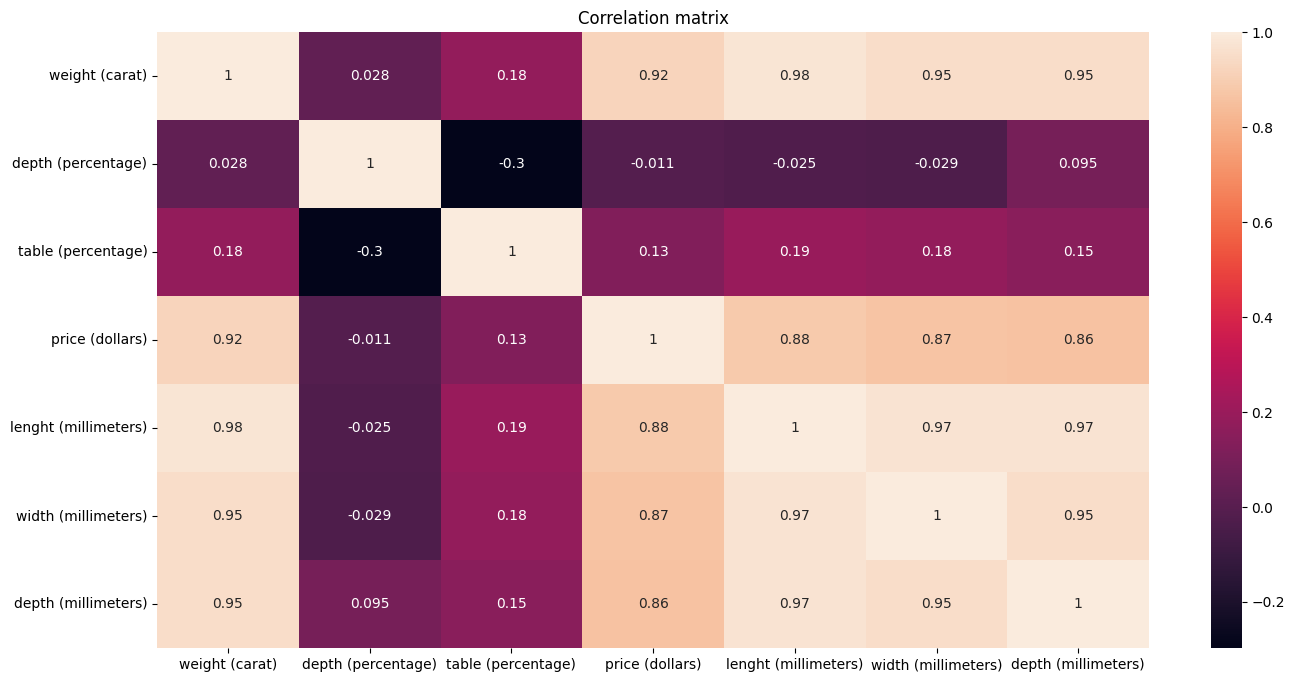

In [95]:
# Hacemos una correlación preeliminar (sin análisis) que nos servirá para detectar errores, si los hay, durante la limpieza
plt.rc("figure", figsize=(16, 8))

corr = df_diamonds.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.title('Correlation matrix')
plt.show()


In [96]:
plt.rc("figure", figsize=(6.4, 4.8))


# Desglose por columnas

## weight (carat)

In [97]:
df_diamonds['weight (carat)'].unique()


array([0.23, 0.21, 0.29, 0.31, 0.24, 0.26, 0.22, 0.3 , 0.2 , 0.32, 0.33,
       0.25, 0.35, 0.42, 0.28, 0.38, 0.7 , 0.86, 0.71, 0.78, 0.96, 0.73,
       0.8 , 0.75, 0.74, 0.81, 0.59, 0.9 , 0.91, 0.61, 0.77, 0.63, 0.76,
       0.64, 0.72, 0.79, 0.58, 1.17, 0.6 , 0.83, 0.54, 0.98, 0.52, 1.01,
       0.53, 0.84, 0.51, 1.05, 0.55, 0.87, 1.  , 0.57, 0.82, 1.04, 0.93,
       1.2 , 0.99, 0.34, 0.43, 0.36, 0.95, 0.89, 1.02, 0.97, 0.56, 0.85,
       0.92, 1.27, 0.66, 1.12, 0.68, 1.03, 0.62, 1.22, 1.08, 0.88, 0.5 ,
       1.19, 0.39, 0.65, 1.24, 1.5 , 0.27, 0.41, 1.13, 1.06, 0.69, 0.4 ,
       1.14, 0.94, 1.29, 1.52, 1.16, 1.21, 1.23, 1.09, 0.67, 1.11, 1.1 ,
       1.18, 1.15, 1.25, 1.07, 1.28, 1.51, 0.37, 1.31, 1.26, 1.39, 1.44,
       1.35, 1.3 , 1.32, 1.41, 1.36, 1.45, 1.34, 1.58, 1.54, 1.38, 1.33,
       1.74, 1.64, 1.47, 1.4 , 1.55, 1.95, 2.  , 1.37, 1.83, 1.62, 1.57,
       1.69, 2.06, 1.72, 1.66, 2.14, 1.49, 1.46, 2.15, 1.96, 2.22, 1.7 ,
       1.53, 1.85, 2.01, 2.27, 1.68, 1.56, 1.81, 1.

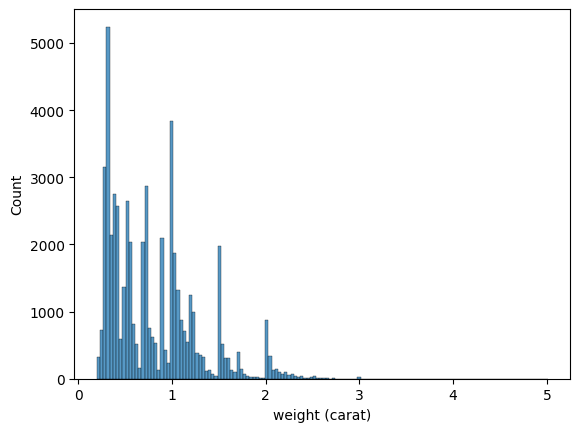

In [98]:
# Hay muy pocos diamantes que pesen más de 2 "carat" (quilates)
sns.histplot(df_diamonds['weight (carat)'])
plt.show()


In [99]:
# No hay valores que sean cero
df_diamonds[df_diamonds['weight (carat)'] == 0] 


,weight (carat),cut quality,color quality,clarity quality,depth (percentage),table (percentage),price (dollars),lenght (millimeters),width (millimeters),depth (millimeters)


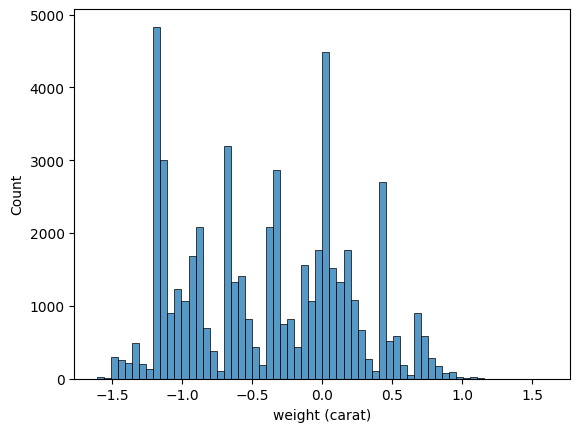

In [100]:
# Está muy a la izquierda. Utilizamos el logaritmo para centrarlo
df_diamonds['weight (carat)'] = np.log(df_diamonds['weight (carat)'])

sns.histplot(df_diamonds['weight (carat)'])
plt.show()


### "Outliers" tratados

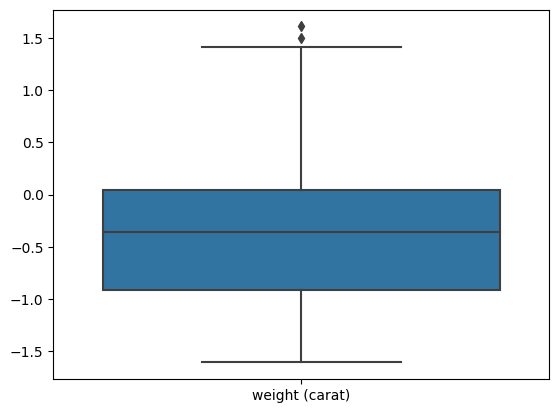

In [101]:
# Confirmamos con un boxplot que quedan solo un par de valores atípicos
ax = sns.boxplot(df_diamonds['weight (carat)'])
ax.set_xticklabels(['weight (carat)'])
plt.show()


In [102]:
# Como están cerca del máximo del boxplot, los imputamos a esa cifra
q3, q1 = np.percentile(df_diamonds['weight (carat)'], [75, 25])
iqr = q3 - q1

df_diamonds.loc[df_diamonds['weight (carat)'] > q3 + 1.5*iqr, 'weight (carat)'] = q3 + 1.5*iqr


## cut quality

In [103]:
# No es numérica, habrá que transformarla. 
cut_uniques = list(df_diamonds['cut quality'].unique())
cut_uniques


['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']

In [104]:
very_good = cut_uniques[3]
cut_uniques.remove(very_good)
cut_uniques.insert(2, very_good)

for index, value in (enumerate(reversed(cut_uniques))):
    df_diamonds.loc[df_diamonds['cut quality'] == value, 'cut quality'] = index
    print(index, value)


0 Fair
1 Good
2 Very Good
3 Premium
4 Ideal


In [105]:
df_diamonds['cut quality'] = df_diamonds['cut quality'].astype(int)

df_diamonds['cut quality'].unique()


array([4, 3, 1, 2, 0])

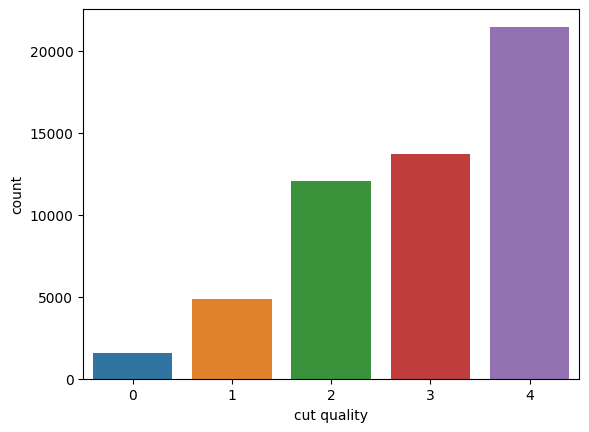

In [106]:
# Están bastente repartidos, aunque hay menos de categoría "Good" (1) o inferior
sns.countplot(x=df_diamonds['cut quality'])
plt.show()


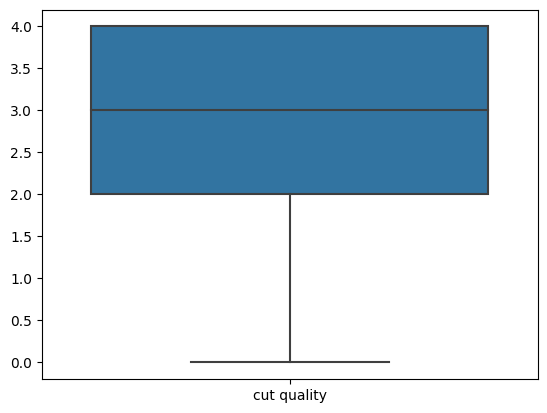

In [107]:
# En efecto, no hay "outliers"
ax = sns.boxplot(df_diamonds['cut quality'])
ax.set_xticklabels(['cut quality'])
plt.show()


## color quality

In [108]:
color_uniques = list(df_diamonds['color quality'].unique())
color_uniques.sort(reverse=True)
color_uniques


['J', 'I', 'H', 'G', 'F', 'E', 'D']

In [109]:
# Similar al anterior, hay que pasar los valores a numéricos (J es la peor calidad, y D es la mejor)
for index, value in enumerate(color_uniques):
    df_diamonds.loc[df_diamonds['color quality'] == value, 'color quality'] = index
    print(index, value)


0 J
1 I
2 H
3 G
4 F
5 E
6 D


In [110]:
df_diamonds['color quality'] = df_diamonds['color quality'].astype(int)

df_diamonds['color quality'].unique()


array([5, 1, 0, 2, 4, 3, 6])

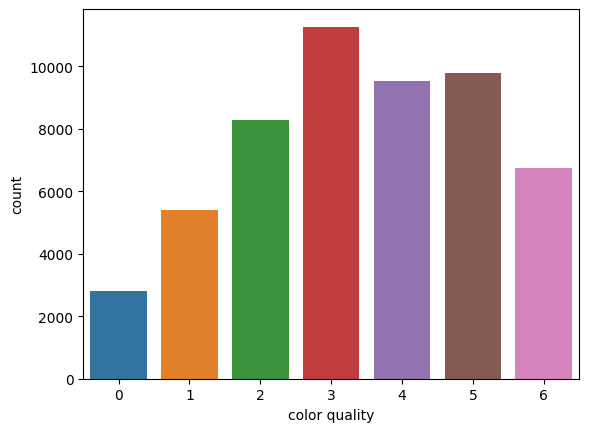

In [111]:
# Están rpartidos, si bien hay pocos de calidad J (0)
sns.countplot(x=df_diamonds['color quality'])
plt.show()


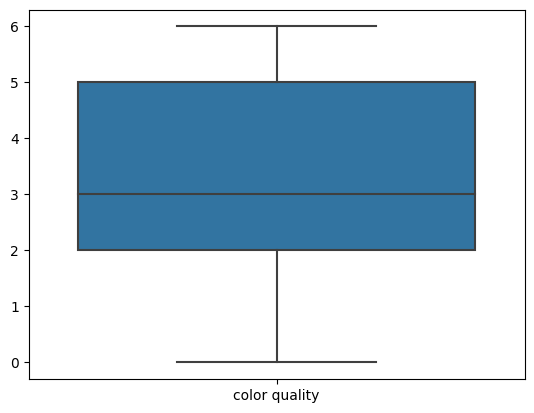

In [112]:
# Sin valores atípicos
ax = sns.boxplot(df_diamonds['color quality'])
ax.set_xticklabels(['color quality'])
plt.show()


## clarity quality

In [113]:
# Hay que buscar a qué nivel de calidad corresponde cada valor y numerarlos
df_diamonds['clarity quality'].unique()


array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [114]:
# Fuente: https://www.77diamonds.com/es/grados-de-pureza-del-diamante
df_diamonds['clarity quality'] = df_diamonds['clarity quality'].apply(lambda x: 0 if x == 'I1'
                                                                        else 1 if x == 'SI2'
                                                                        else 2 if x == 'SI1'
                                                                        else 3 if x == 'VS2'
                                                                        else 4 if x == 'VS1'
                                                                        else 5 if x == 'VVS2'
                                                                        else 6 if x == 'VVS1'
                                                                        else 7
                                                                        )

df_diamonds['clarity quality'].unique()


array([1, 2, 4, 3, 5, 6, 0, 7], dtype=int64)

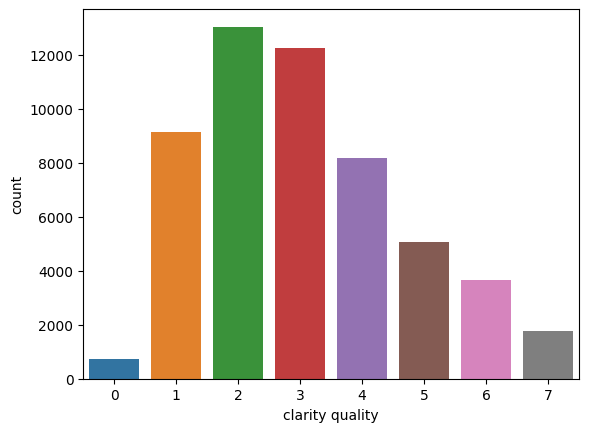

In [115]:
# Tal como indica la fuente, los diamantes de máxima calidad son muy raros. Hay menos, todavía, de la peor calidad
sns.countplot(x=df_diamonds['clarity quality'])
plt.show()


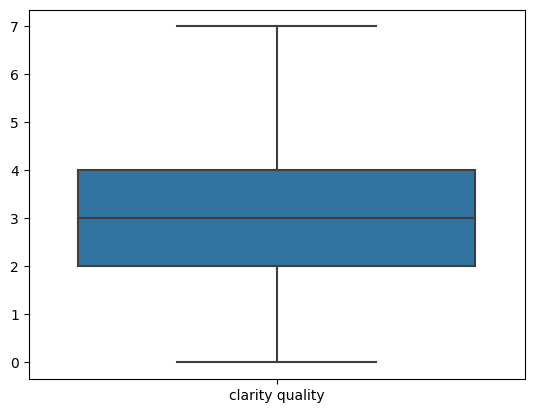

In [116]:
# Con todo, no hay "outliers"
ax = sns.boxplot(df_diamonds['clarity quality'])
ax.set_xticklabels(['clarity quality'])
plt.show()


## depth (percentage)

In [117]:
df_diamonds['depth (percentage)'].unique()


array([61.5, 59.8, 56.9, 62.4, 63.3, 62.8, 62.3, 61.9, 65.1, 59.4, 64. ,
       60.4, 62.2, 60.2, 60.9, 62. , 63.4, 63.8, 62.7, 61. , 58.1, 62.5,
       60.5, 60. , 60.7, 59.5, 58.2, 64.1, 60.8, 61.8, 61.2, 61.1, 65.2,
       58.4, 63.1, 61.6, 59.3, 62.6, 63. , 63.2, 62.1, 61.4, 62.9, 63.7,
       59.2, 59.9, 57.9, 55.1, 57.5, 66.3, 61.7, 58.8, 64.5, 65.3, 59.6,
       64.4, 65.7, 63.6, 61.3, 60.1, 60.3, 58. , 64.6, 59.7, 57.8, 67.9,
       60.6, 57.2, 64.2, 65.8, 67.4, 59. , 63.5, 67.3, 58.7, 66.4, 68.1,
       63.9, 55. , 58.6, 64.3, 58.5, 65. , 56. , 58.3, 53.1, 64.9, 59.1,
       58.9, 66.7, 57.7, 65.4, 53.3, 53. , 67.8, 66.1, 55.8, 67.6, 68.2,
       65.5, 67.7, 69.5, 56.6, 56.3, 66.9, 66. , 67. , 57.6, 67.1, 65.6,
       64.8, 69.3, 66.2, 55.4, 66.8, 64.7, 66.6, 55.9, 57.3, 57.4, 68.3,
       68.5, 56.2, 65.9, 56.5, 56.1, 66.5, 68.4, 69.7, 57.1, 68.7, 56.7,
       68.6, 71.6, 43. , 68.8, 67.5, 69. , 55.2, 68.9, 69.6, 57. , 56.4,
       56.8, 44. , 67.2, 70.1, 71.3, 70.6, 69.8, 71

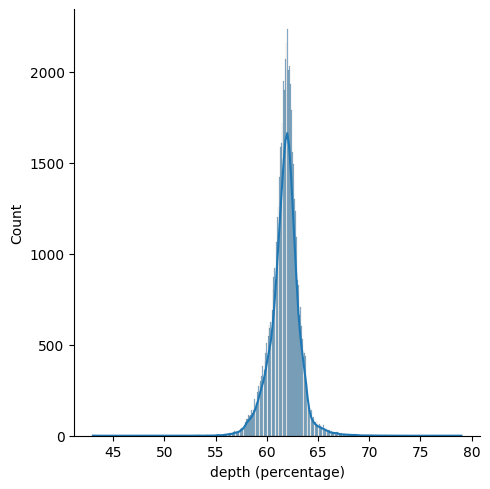

In [118]:
# Si no fuera porque el grueso de los números se encuentra en el centro, se asemejaría bastante a una distribución normal
sns.displot(df_diamonds['depth (percentage)'], kde=True)
plt.show()


### "Outliers" tratados en: "Desglose por múltiples variables"

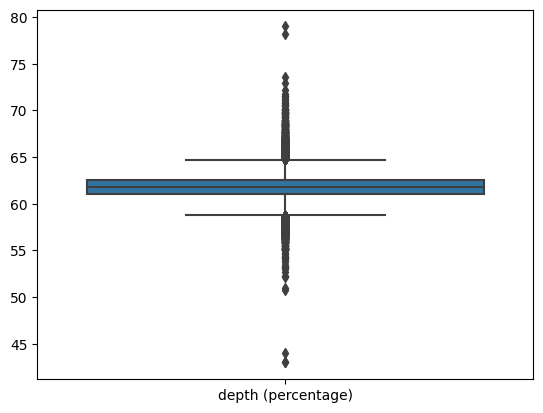

In [119]:
# A consecuencia de ello, hay muchos "outliers". Se nota la concentración en el centro
ax = sns.boxplot(df_diamonds['depth (percentage)'])
ax.set_xticklabels(['depth (percentage)'])
plt.show()


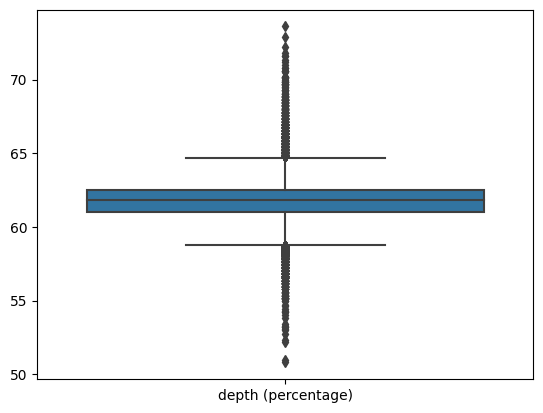

In [120]:
# Liquidamos esos cuatro "outliers" exageradamente altos
df_diamonds = df_diamonds.drop(df_diamonds[(df_diamonds['depth (percentage)'] > 75) | (df_diamonds['depth (percentage)'] < 45)].index)

ax = sns.boxplot(df_diamonds['depth (percentage)'])
ax.set_xticklabels(['depth (percentage)'])
plt.show()


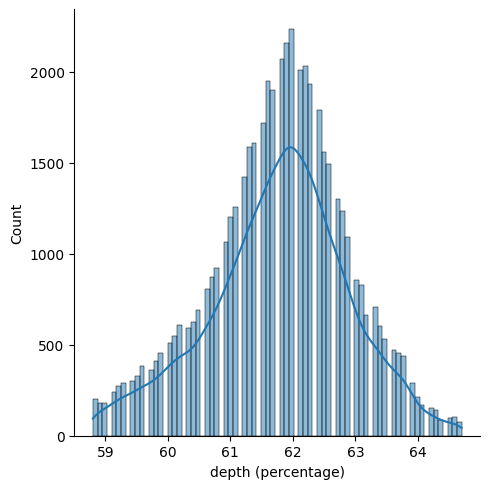

In [121]:
# Repetimos la gráfica de densidad, pero, esta vez, filtramos los valores atípicos para una mejor visualización
q3, q1 = np.percentile(df_diamonds['depth (percentage)'], [75, 25])
iqr = q3 - q1

df_depth_filtered = df_diamonds[(df_diamonds['depth (percentage)'] <= q3 + 1.5*iqr) & (df_diamonds['depth (percentage)'] >= q1 - 1.5*iqr)]

sns.displot(df_depth_filtered['depth (percentage)'], kde=True)
plt.show()


## table (percentage)

In [122]:
df_diamonds['table (percentage)'].unique()


array([55. , 61. , 65. , 58. , 57. , 56. , 54. , 62. , 59. , 63. , 60. ,
       55.3, 69. , 53. , 64. , 56.4, 60.5, 67. , 52. , 55.8, 66. , 70. ,
       68. , 54.4, 57.1, 53.6, 54.8, 54.2, 54.9, 56.7, 53.9, 57.8, 54.1,
       55.1, 51. , 58.1, 56.9, 56.5, 53.7, 60.7, 56.2, 56.6, 56.1, 56.3,
       57.2, 57.5, 60.9, 59.8, 62.3, 60.1, 55.9, 50.1, 62.2, 54.5, 55.7,
       53.4, 54.7, 58.8, 59.4, 62.5, 54.3, 60.6, 55.2, 58.6, 49. , 50. ,
       54.6, 62.6, 57.7, 56.8, 57.9, 60.3, 55.6, 59.5, 57.4, 62.4, 60.4,
       53.3, 60.2, 60.8, 58.5, 57.6, 43. , 59.9, 63.5, 57.3, 61.4, 58.3,
       55.4, 58.2, 53.5, 59.7, 55.5, 58.7, 53.8, 59.1, 53.2, 59.3, 61.1,
       51.6, 95. , 61.2, 59.2, 58.4, 53.1, 52.8, 44. , 61.3, 61.9, 61.8,
       59.6, 61.5, 58.9, 64.3, 62.8, 71. , 52.4, 63.3, 61.7, 64.2, 73. ,
       65.4, 63.4, 62.1, 79. , 76. , 61.6])

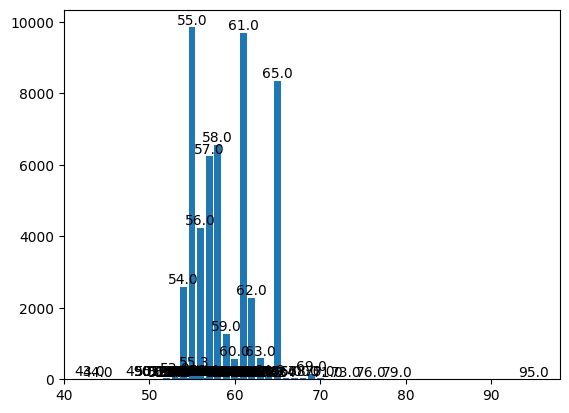

In [123]:
# Vemos que la inmensa mayoría se encuentran entre 50% y 65%, con números distintos, y que hay unos pocos valores que se repiten mucho
# Detectamos también un "outlier" flagrante del 95%
barplot = plt.bar(x=df_diamonds['table (percentage)'].unique(), height=df_diamonds['table (percentage)'].value_counts())
plt.bar_label(barplot, labels=df_diamonds['table (percentage)'].unique(), label_type='edge')
plt.show()


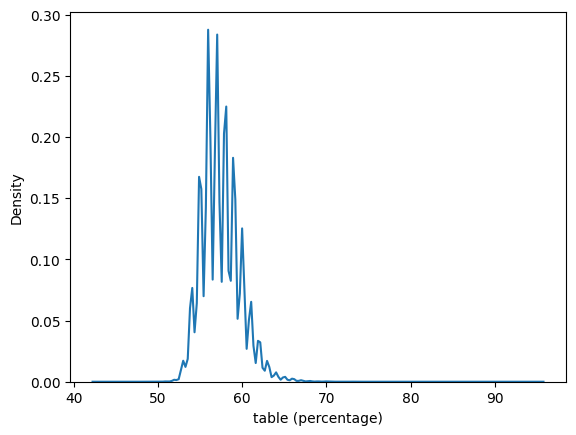

In [124]:
# Visualizamos su gráfica de densidad
sns.kdeplot(df_diamonds['table (percentage)'])
plt.show()


### "Outliers" tratados en: "Desglose por múltiples variables"

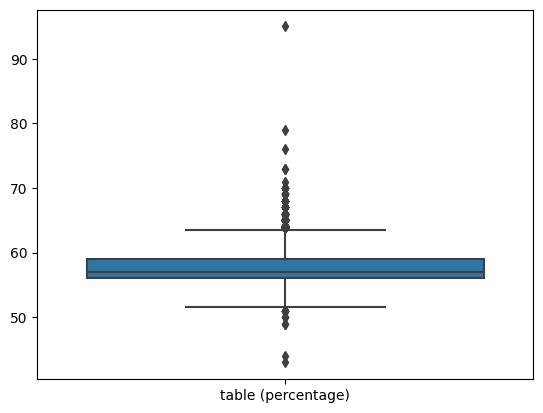

In [125]:
# Como es de preveer hay muchos "outliers", sobre todo por la parte superior, y una concentración importante entre 55% y 60%
ax = sns.boxplot(df_diamonds['table (percentage)'])
ax.set_xticklabels(['table (percentage)'])
plt.show()


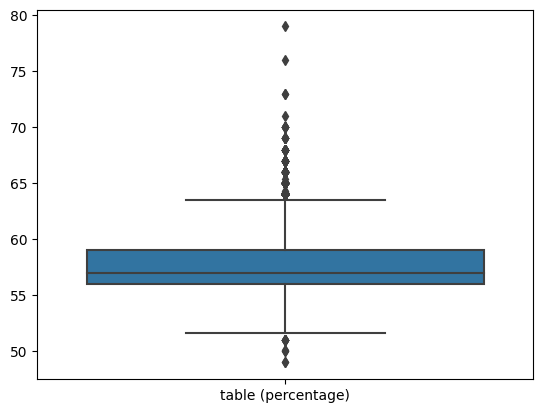

In [126]:
# Hay un solo valor muy alto y dos muy bajos. Nos podemos permitir eliminarlos
df_diamonds = df_diamonds.drop(df_diamonds[(df_diamonds['table (percentage)'] > 90) | (df_diamonds['table (percentage)'] < 45)].index)

ax = sns.boxplot(df_diamonds['table (percentage)'])
ax.set_xticklabels(['table (percentage)'])
plt.show()


## price (dollars) - target

In [127]:
# Esta es la columna "target"
df_diamonds['price (dollars)'].unique()


array([ 326,  327,  334, ..., 2753, 2755, 2756], dtype=int64)

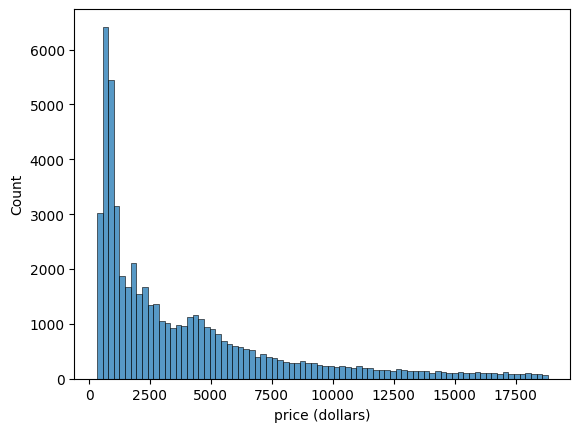

In [128]:
# Hay muchos diamantes con un precio "asequible", y cada vez menos a medida que se encarece
sns.histplot(df_diamonds['price (dollars)'])
plt.show()


In [129]:
# Como las cifras de precios son mucho más elevadas que el resto de la tabla, las reducimos 
df_diamonds['price (dollars)'] = preprocessing.scale(df_diamonds['price (dollars)'], axis=0, copy=False)


### "Outliers" - target

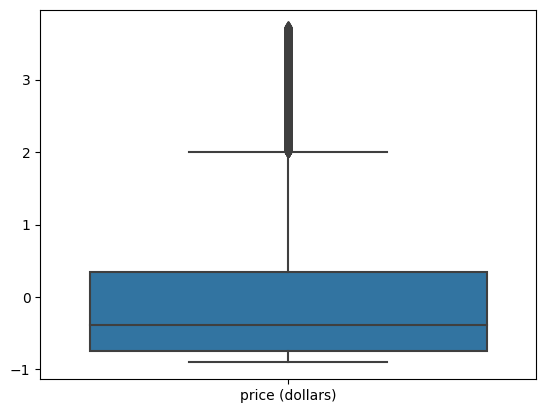

In [130]:
# Hay "outliers" en los precios más altos
ax = sns.boxplot(df_diamonds['price (dollars)'])
ax.set_xticklabels(['price (dollars)'])
plt.show()


## lenght (millimeters)

In [131]:
df_diamonds['lenght (millimeters)'].unique()


array([ 3.95,  3.89,  4.05,  4.2 ,  4.34,  3.94,  4.07,  3.87,  4.  ,
        4.25,  3.93,  3.88,  4.35,  3.79,  4.38,  4.31,  4.23,  4.21,
        4.26,  3.85,  4.39,  4.44,  3.97,  4.28,  3.96,  4.04,  4.01,
        3.92,  4.06,  3.83,  4.29,  4.13,  4.49,  3.99,  4.19,  4.24,
        4.36,  4.33,  4.02,  4.45,  3.91,  4.3 ,  4.43,  4.54,  4.78,
        4.15,  4.08,  4.03,  4.65,  4.22,  5.7 ,  6.45,  5.68,  5.81,
        5.85,  5.71,  6.27,  5.77,  5.97,  5.8 ,  6.  ,  5.94,  5.87,
        5.9 ,  6.14,  5.38,  5.96,  6.16,  5.73,  5.98,  5.72,  6.01,
        5.64,  5.57,  5.63,  5.65,  6.09,  5.56,  6.11,  6.03,  5.89,
        5.69,  5.62,  5.88,  5.52,  5.74,  5.53,  5.78,  5.83,  5.66,
        5.82,  5.79,  5.92,  5.39,  5.33,  6.83,  5.41,  5.25,  5.24,
        5.67,  5.61,  5.76,  6.05,  5.6 ,  5.19,  5.84,  6.39,  5.34,
        5.14,  5.11,  5.54,  6.07,  6.29,  6.31,  6.49,  5.28,  5.48,
        5.55,  6.41,  6.02,  5.91,  6.17,  6.61,  5.12,  6.19,  5.43,
        5.99,  5.95,

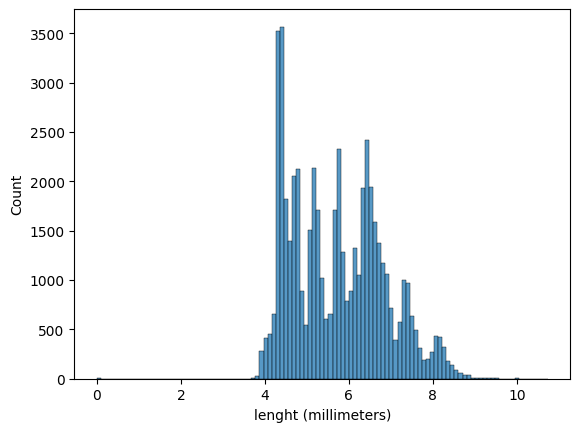

In [132]:
# Hay muchos valores únicos, así que usamos un histograma
# Claramente ese valor cercano a cero es un "outlier"
# Hay, además, unos pocos valores muy altos, cercanos a 10
sns.histplot(df_diamonds['lenght (millimeters)'])
plt.show()


In [133]:
# Si miramos esos ceros, vemos que, salvo uno, tampoco tenen width ni depth
df_diamonds[df_diamonds['lenght (millimeters)'] == 0]


,weight (carat),cut quality,color quality,clarity quality,depth (percentage),table (percentage),price (dollars),lenght (millimeters),width (millimeters),depth (millimeters)
11182,0.067659,4,4,1,61.6,56.0,0.256012,0.0,6.62,0.0
11963,0.000000,2,2,3,63.3,53.0,0.302400,0.0,0.00,0.0
15951,0.131028,0,3,4,57.5,67.0,0.613825,0.0,0.00,0.0
24520,0.444686,4,3,3,62.2,54.0,2.223358,0.0,0.00,0.0
26243,0.182322,3,6,6,62.1,59.0,2.947009,0.0,0.00,0.0
27429,0.810930,3,2,1,62.8,59.0,3.535759,0.0,0.00,0.0
49556,-0.342490,1,4,1,64.1,60.0,-0.452093,0.0,0.00,0.0


In [134]:
# Como esas tres variables son probablemente las que más influyen en el precio, eliminamos directamente los diamantes que solo tienen ceros para mayor precisión
df_diamonds = df_diamonds.drop(df_diamonds[(df_diamonds['lenght (millimeters)'] == 0) 
                                & (df_diamonds['width (millimeters)'] == 0)
                                & (df_diamonds['depth (millimeters)'] == 0)
                                            ].index
                                )

df_diamonds[df_diamonds['lenght (millimeters)'] == 0]


,weight (carat),cut quality,color quality,clarity quality,depth (percentage),table (percentage),price (dollars),lenght (millimeters),width (millimeters),depth (millimeters)
11182,0.067659,4,4,1,61.6,56.0,0.256012,0.0,6.62,0.0


In [135]:
# En cuanto al restante, comprobamos la relación entre las columnas "lenght" y "width"
# Como los diamantes son más o menos circulares, a priori, los números de "lenght" y "width" son bastante similares
# Fuente: https://www.diamondonnet.com/knowledges/help?sword=Length%20To%20Width%20Ratio
df_diamonds[['lenght (millimeters)','width (millimeters)']].head()


,lenght (millimeters),width (millimeters)
0,3.95,3.98
1,3.89,3.84
2,4.05,4.07
3,4.20,4.23
4,4.34,4.35


In [136]:
# Tanto es así que, excluyendo ese cero y redondeados, son exactamente iguales todos
all(df_diamonds['lenght (millimeters)'].drop(11182).apply(lambda x: round(x))) == all(df_diamonds['width (millimeters)'].drop(11182).apply(lambda x: round(x)))


True

In [137]:
# Suponemos, pues, que para ese diamente con cero son el mismo
# Por tanto, asignamos a ese cero la cifra correspondiente de la columna "width"
# Seguidamente, aplicamos el logaritmo

df_diamonds.loc[df_diamonds.index == 11182, 'lenght (millimeters)'] = 6.62
df_diamonds['lenght (millimeters)'] = np.log(df_diamonds['lenght (millimeters)'])


### "Outliers" tratados

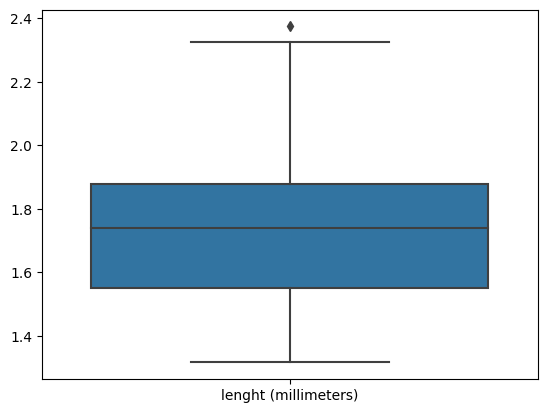

In [138]:
# Comprobamos que ya no quedan "outliers" por debajo de la mediana, y que queda uno por encima
ax = sns.boxplot(df_diamonds['lenght (millimeters)'])
ax.set_xticklabels(['lenght (millimeters)'])
plt.show()


In [139]:
# Sabemos que, por lo general, al tratarse de diamantes prácticamente circulares, el "lenght" y el "width" suelen ser muy parecidos
# Por tanto, imputamos ese valor atípico de "lenght" al "width" correspondiente para librarnos de él
q3, q1 = np.percentile(df_diamonds['lenght (millimeters)'], [75, 25])
iqr = q3 - q1

df_diamonds.loc[df_diamonds['lenght (millimeters)'] > q3 + 1.5*iqr, 'lenght (millimeters)'] = 2.355178


## width (millimeters)

In [140]:
df_diamonds['width (millimeters)'].unique()


array([ 3.98,  3.84,  4.07,  4.23,  4.35,  3.96,  4.11,  3.78,  4.05,
        4.28,  3.9 ,  4.37,  3.75,  4.42,  4.34,  4.29,  4.26,  4.27,
        4.3 ,  3.92,  4.43,  4.47,  4.01,  3.94,  3.97,  3.99,  4.03,
        4.06,  4.08,  3.85,  4.31,  4.16,  4.51,  4.5 ,  4.55,  4.02,
        4.24,  4.38,  3.95,  4.48,  3.89,  3.88,  4.33,  4.32,  4.59,
        4.84,  4.22,  4.  ,  4.25,  4.13,  4.09,  4.04,  4.12,  4.67,
        5.72,  6.33,  5.67,  5.73,  5.85,  5.9 ,  5.76,  5.95,  5.78,
        5.93,  5.75,  5.96,  5.79,  5.87,  5.8 ,  5.81,  6.11,  5.43,
        6.  ,  5.84,  6.12,  5.82,  5.74,  5.94,  6.07,  5.69,  5.83,
        5.61,  5.53,  5.58,  5.59,  5.97,  6.09,  5.99,  5.86,  5.68,
        5.65,  5.55,  5.77,  5.91,  5.56,  5.89,  5.92,  6.03,  5.44,
        5.37,  5.88,  6.9 ,  5.62,  5.27,  5.26,  5.7 ,  5.64,  5.63,
        5.71,  5.51,  5.22,  6.36,  5.54,  5.66,  6.2 ,  5.18,  5.15,
        6.1 ,  6.21,  6.22,  6.45,  6.01,  5.3 ,  5.41,  5.52,  6.27,
        6.05,  6.06,

### "Outliers" tratados

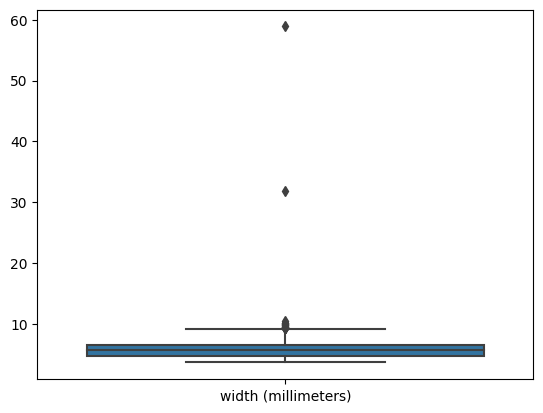

In [141]:
# En este caso están extremadamente concentrados, si bien hay unos pocos valores, poquísimos, superiores a 10
ax = sns.boxplot(df_diamonds['width (millimeters)'])
ax.set_xticklabels(['width (millimeters)'])
plt.show()


In [142]:
# Hay dos valores exageradamente altos. Los borramos. Con los que hemos eliminado antes en "lenght", ya no quedan ceros tampoco en "width"
df_diamonds = df_diamonds.drop(df_diamonds[df_diamonds['width (millimeters)'] > 30].index)

df_diamonds[df_diamonds['width (millimeters)'] == 0]


,weight (carat),cut quality,color quality,clarity quality,depth (percentage),table (percentage),price (dollars),lenght (millimeters),width (millimeters),depth (millimeters)


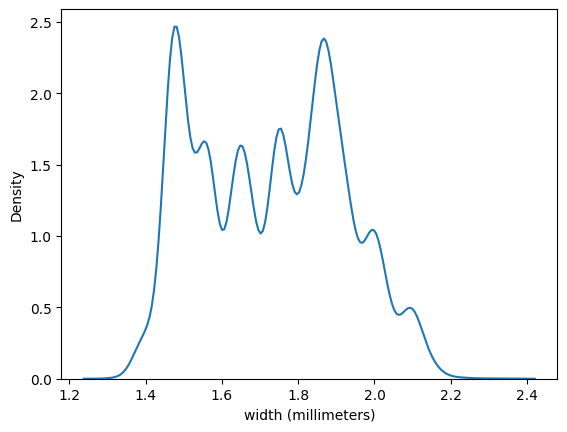

In [143]:
# Por tanto, podemos aplicar el logaritmo
df_diamonds['width (millimeters)'] = np.log(df_diamonds['width (millimeters)'])

sns.kdeplot(df_diamonds['width (millimeters)'])
plt.show()


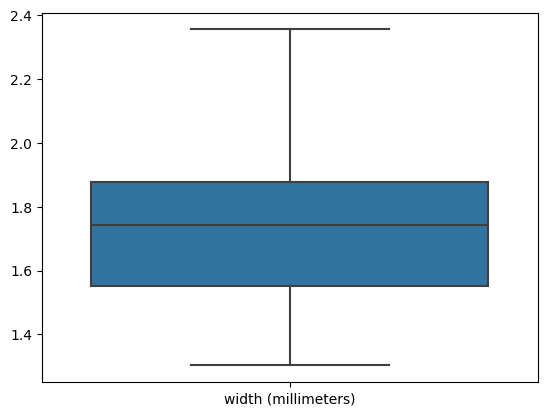

In [144]:
# Con lo hecho, ya no quedan valores atípicos
ax = sns.boxplot(df_diamonds['width (millimeters)'])
ax.set_xticklabels(['width (millimeters)'])
plt.show()


## depth (millimeters)

In [145]:
df_diamonds['depth (millimeters)'].unique()


array([ 2.43,  2.31,  2.63,  2.75,  2.48,  2.47,  2.53,  2.49,  2.39,
        2.73,  2.46,  2.33,  2.71,  2.27,  2.68,  2.7 ,  2.66,  2.41,
        2.62,  2.59,  2.67,  2.4 ,  2.42,  2.44,  2.37,  2.52,  2.78,
        2.76,  2.61,  2.65,  2.79,  2.54,  2.64,  2.45,  2.72,  2.69,
        2.96,  2.58,  2.51,  2.56,  2.55,  2.87,  3.57,  3.52,  3.5 ,
        3.56,  3.72,  3.38,  3.4 ,  4.07,  3.66,  3.65,  3.58,  3.59,
        3.63,  3.69,  3.61,  3.6 ,  3.35,  3.67,  3.62,  3.87,  3.68,
        3.49,  3.47,  3.46,  3.7 ,  3.32,  3.93,  3.95,  3.64,  3.53,
        3.37,  3.43,  3.51,  3.54,  3.48,  3.55,  3.33,  3.3 ,  4.13,
        3.79,  3.24,  3.23,  4.08,  3.19,  3.94,  3.08,  3.31,  3.21,
        3.75,  3.18,  3.41,  4.03,  4.09,  3.22,  4.18,  3.76,  3.83,
        3.17,  3.44,  3.74,  3.8 ,  3.39,  3.88,  4.  ,  3.98,  3.85,
        3.96,  3.16,  3.78,  3.84,  4.33,  4.01,  3.45,  2.74,  2.95,
        2.8 ,  2.77,  2.9 ,  2.82,  3.77,  3.9 ,  3.73,  3.34,  3.86,
        3.89,  3.81,

In [146]:
# Empezamos por comprobar los ceros. Hay bastantes
df_diamonds[df_diamonds['depth (millimeters)'] == 0]


,weight (carat),cut quality,color quality,clarity quality,depth (percentage),table (percentage),price (dollars),lenght (millimeters),width (millimeters),depth (millimeters)
2207,0.000000,3,3,1,59.1,59.0,-0.198339,1.879465,1.868721,0.0
2314,0.009950,3,2,0,58.1,59.0,-0.192070,1.896119,1.887070,0.0
4791,0.095310,3,3,1,63.0,59.0,-0.059426,1.871802,1.867176,0.0
5471,0.009950,3,4,1,59.2,58.0,-0.024071,1.871802,1.867176,0.0
10167,0.405465,1,3,0,64.0,61.0,0.200095,1.967112,1.951608,0.0
11182,0.067659,4,4,1,61.6,56.0,0.256012,1.890095,1.890095,0.0
13601,0.139762,4,3,3,59.2,56.0,0.408966,1.928619,1.921325,0.0
24394,0.779325,3,2,1,59.4,61.0,2.180983,2.138889,2.134166,0.0
26123,0.810930,3,1,2,61.3,58.0,2.874544,2.142416,2.130610,0.0
27112,0.788457,3,2,2,61.2,59.0,3.342936,2.130610,2.124654,0.0


In [147]:
# Sabemos que el "depth (percentage)" se obtiene de dividir su altura total ("depth") por el diámetro
# Como tenemos el "lenght" y el "width", el diámetro se obtiene con la media de esas dos cifras
# Por tanto, podemos resolver esos ceros con una operación

df_diamonds.loc[df_diamonds['depth (millimeters)'] == 0, 'depth (millimeters)'] = df_diamonds['depth (percentage)'] / 100 * (df_diamonds['lenght (millimeters)']+df_diamonds['width (millimeters)']) / 2

df_diamonds[df_diamonds['depth (millimeters)'] == 0]


,weight (carat),cut quality,color quality,clarity quality,depth (percentage),table (percentage),price (dollars),lenght (millimeters),width (millimeters),depth (millimeters)


### "Outliers" tratados en: "Desglose por múltiples variables"

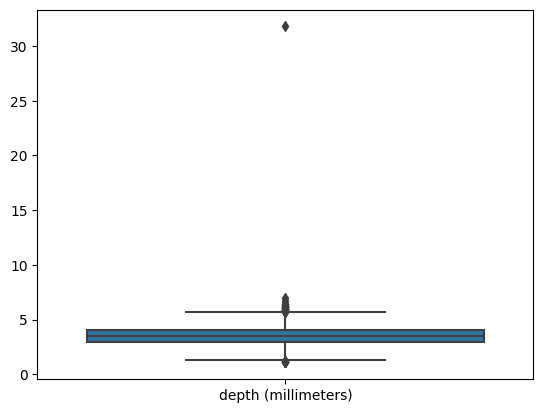

In [148]:
# Vemos que ya no hay ceros, que los valores están concentrados y que hay varios "outliers"; uno de ellos, muy alto
ax = sns.boxplot(df_diamonds['depth (millimeters)'])
ax.set_xticklabels(['depth (millimeters)'])
plt.show()


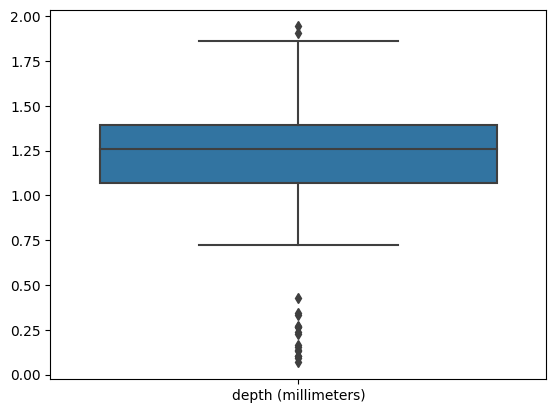

In [149]:
# Hay un solo valor exageradamente alto. Lo liquidamos y aplicamos el logaritmo para centrar la gráfica
df_diamonds = df_diamonds.drop(df_diamonds[df_diamonds['depth (millimeters)'] > 30].index)

df_diamonds['depth (millimeters)'] = np.log(df_diamonds['depth (millimeters)'])

ax = sns.boxplot(df_diamonds['depth (millimeters)'])
ax.set_xticklabels(['depth (millimeters)'])
plt.show()


# Desglose por múltiples variables

In [150]:
df_diamonds.head()


,weight (carat),cut quality,color quality,clarity quality,depth (percentage),table (percentage),price (dollars),lenght (millimeters),width (millimeters),depth (millimeters)
0,-1.469676,4,5,1,61.5,55.0,-0.904437,1.373716,1.381282,0.887891
1,-1.560648,3,5,2,59.8,61.0,-0.904437,1.358409,1.345472,0.837248
2,-1.469676,1,5,4,56.9,65.0,-0.904186,1.398717,1.403643,0.837248
3,-1.237874,3,1,3,62.4,58.0,-0.902431,1.435085,1.442202,0.966984
4,-1.171183,1,0,1,63.3,58.0,-0.902180,1.467874,1.470176,1.011601


In [151]:
# La cuestión de los ceros ha quedado resuelta
df_diamonds.describe()


,weight (carat),cut quality,color quality,clarity quality,depth (percentage),table (percentage),price (dollars),lenght (millimeters),width (millimeters),depth (millimeters)
count,53777.000000,53777.000000,53777.000000,53777.000000,53777.000000,53777.000000,53777.000000,53777.000000,53777.000000,53777.000000
mean,-0.395024,2.904457,3.406084,3.051992,61.748521,57.457794,-0.000191,1.727239,1.727844,1.244825
std,0.584427,1.115762,1.701144,1.646906,1.419471,2.224710,0.999799,0.193611,0.192198,0.194491
min,-1.609438,0.000000,0.000000,0.000000,50.800000,49.000000,-0.904437,1.316408,1.302913,0.067659
25%,-0.916291,2.000000,2.000000,2.000000,61.000000,56.000000,-0.747721,1.549688,1.551809,1.068153
50%,-0.356675,3.000000,3.000000,3.000000,61.800000,57.000000,-0.384141,1.740466,1.742219,1.261298
75%,0.039221,4.000000,5.000000,4.000000,62.500000,59.000000,0.349038,1.877937,1.877937,1.393766
max,1.472488,4.000000,6.000000,7.000000,73.600000,79.000000,3.733597,2.355178,2.355178,1.943049


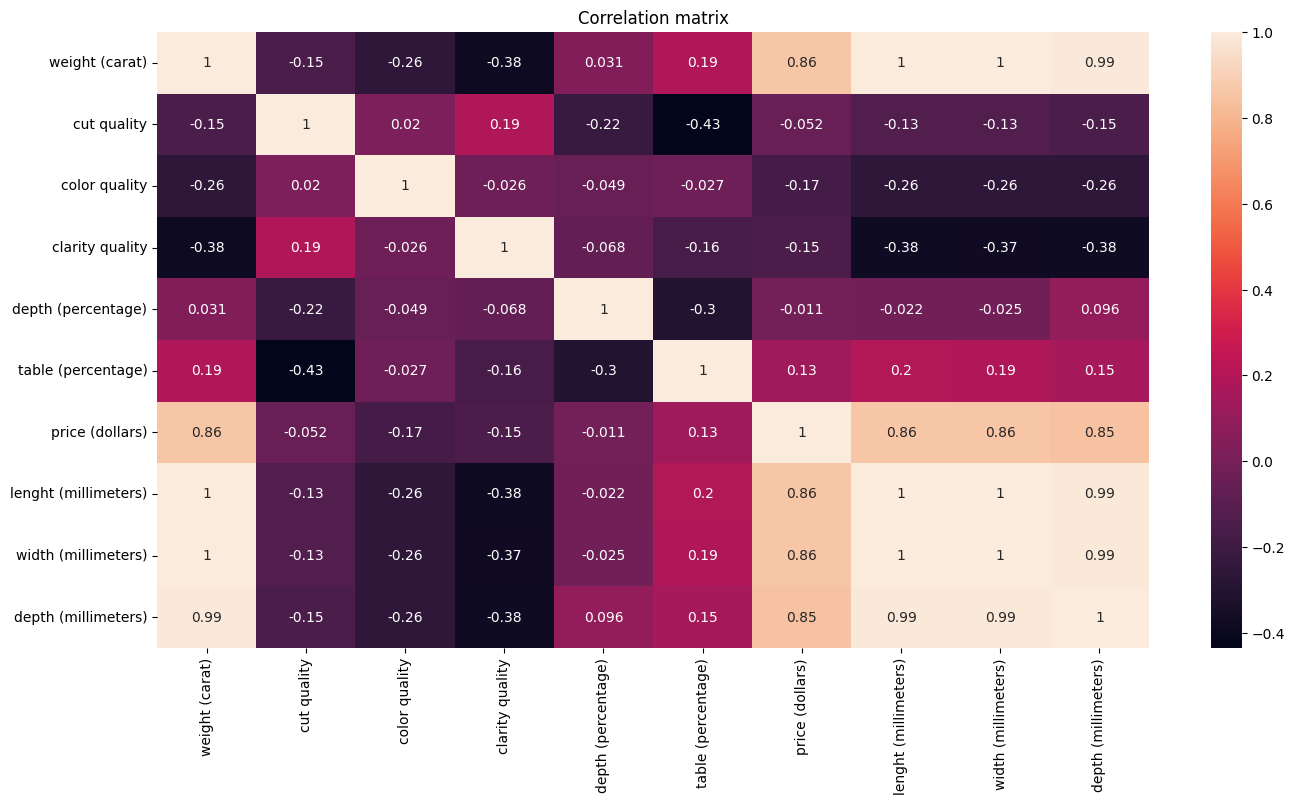

In [152]:
# Parece que lo que más influye en el precio son el tamaño ("lenght", "width" y "depth") y el peso ("weight") del diamante
# Respecto a las medidas específicas para diamantes ("depth" y "table" en %), se supone que mejorar en una suele requerir sacrificar la otra
# Eso a se debería que la "table" (parte plana superior del diamante) es más grande en los diamantes más anchos, y no en los de mayor altura ("depth")
# Asimismo, a mayor tamaño se pierde claridad (probablemente porque, con una mayor superficie, hay más probabilidad de imperfecciones)
# Hay otra correlación negativa entre la calidad del corte y el tamaño de la tabla, quizá porque cuanto mayor es la tabla más perceptibles son los cortes
# Hay que tener en cuenta al comparar que varias variables se han tipificado
plt.rc("figure", figsize=(16, 8))

corr = df_diamonds.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.title('Correlation matrix')
plt.show()


In [153]:
plt.rc("figure", figsize=(6.4, 4.8))


## weight (carat), lenght (millimeters), width (millimeters), depth (millimeters) & price (dollars)

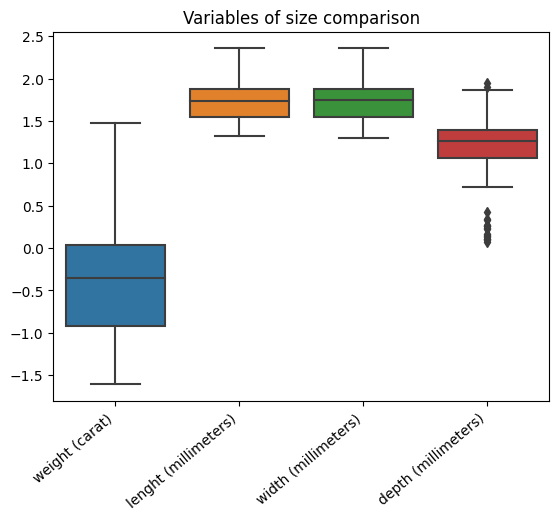

In [154]:
# Las cuatro primeras variables del título, las que vendrían a indicar el tamaño y el peso del diamante, están altísimamente correlacionadas
# Solo "depth" tiene "outliers"

items_list = ['weight (carat)', 'lenght (millimeters)', 'width (millimeters)', 'depth (millimeters)']
df_size = df_diamonds[items_list]

ax = sns.boxplot(df_size)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Variables of size comparison')
plt.show()


In [155]:
# Podemos utilizar un modelo de regresión para predecir esos "outliers" e imputarlos
# Como la correlación es tan extremadamente alta que podría decirse que son prácticamente la misma variable escalada, usamos "ridge"
q3, q1 = np.percentile(df_size['depth (millimeters)'], [75, 25])
iqr = q3 - q1

y_test = df_size[(df_size['depth (millimeters)'] > q3 + 1.5*iqr) | (df_size['depth (millimeters)'] < q1 - 1.5*iqr)]['depth (millimeters)']
y_train = df_size.drop(y_test.index)['depth (millimeters)']

X_train = df_size.drop(y_test.index)[['weight (carat)', 'lenght (millimeters)', 'width (millimeters)']]
X_test = df_size[(df_size['depth (millimeters)'] > q3 + 1.5*iqr) | (df_size['depth (millimeters)'] < q1 - 1.5*iqr)][['weight (carat)', 'lenght (millimeters)', 'width (millimeters)']]

ridge=Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

df_depth = pd.DataFrame(data={'Original depth': y_test, 'Predicted depth': y_pred})
df_depth


,Original depth,Predicted depth
2207,0.102185,1.364820
2314,0.094416,1.360147
4791,0.163630,1.417956
5471,0.101417,1.373509
10167,0.226331,1.526123
11182,0.152119,1.392323
13601,0.130663,1.408743
14635,0.067659,1.391203
20694,0.425268,1.510586
21654,0.343590,1.480682


### "Outliers" tratados de "depth (millimeters)"

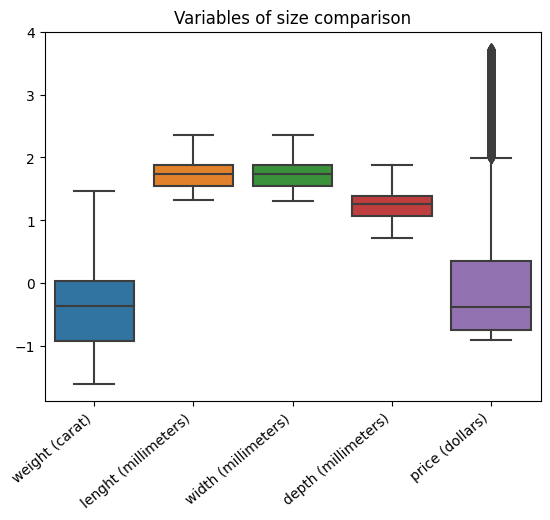

In [156]:
# Los valores atípicos de "depth" han sido neutralizados. Añadimos la columna "target" para compararla. Sigue teniendo numerosos valores atípicos
for index in df_depth.index:
    df_diamonds.loc[index, 'depth (millimeters)'] = df_depth.loc[index, 'Predicted depth']

items_list.append('price (dollars)')

ax = sns.boxplot(df_diamonds[items_list])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Variables of size comparison')
plt.show()


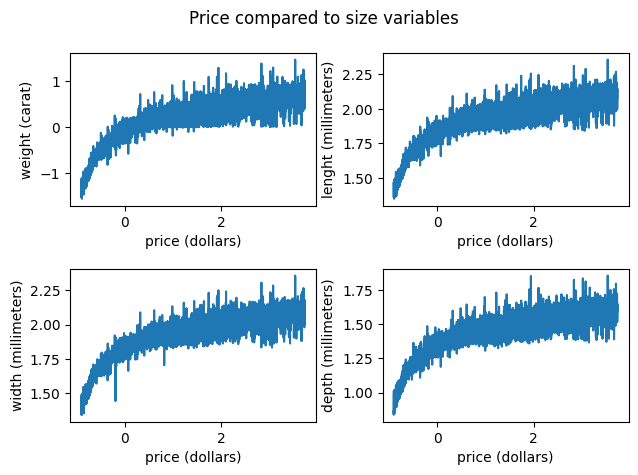

In [157]:
# Comparamos el precio con cada una de las variables relacionadas con el tamaño
# Aplicamos "errorbar=None" para que no compute los intervalos de confianza y sea más rápido
# Detectamos que, efectivamente, suben progresivamente con el precio de un modo similar
for index, element in enumerate(items_list[:-1], 1):
    plt.subplot(2, 2, index)
    sns.lineplot(data=df_diamonds, x=items_list[-1], y=element, errorbar=None)
    plt.legend('',frameon=False)
    plt.xlabel(xlabel=items_list[-1])
    plt.ylabel(ylabel=element)
plt.suptitle('Price compared to size variables')
plt.tight_layout()
plt.show()


## clarity quality, weight (carat), lenght (millimeters), width (millimeters) & depth (millimeters)

In [158]:
# La claridad del diamante (la falta de imperfecciones) tiene una importante correlación inversa (la misma) con las variable relacionadas con el tamaño
# Como las cuatro se comportan de un modo similar, para ver la tendencia las podemos simplificar en una sola
df_diamonds['size'] = (df_diamonds['weight (carat)'] 
                        + df_diamonds['lenght (millimeters)'] 
                        + df_diamonds['width (millimeters)'] 
                        + df_diamonds['depth (millimeters)']) / 4

df_diamonds['size'].unique()


array([0.54330317, 0.49512033, 0.54248286, ..., 1.11077845, 1.19906923,
       1.13429331])

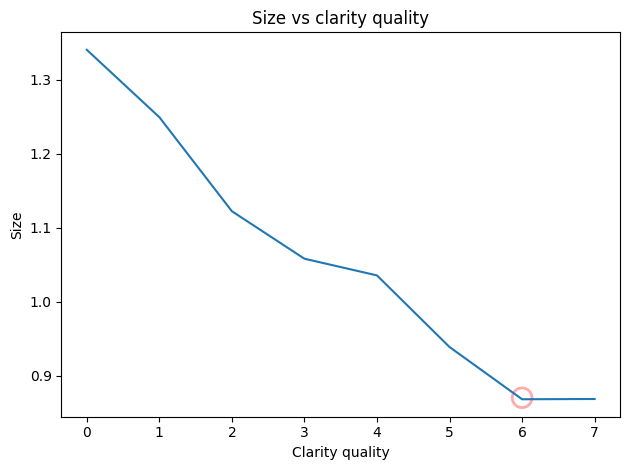

In [159]:
# Excepto con los de mayor "clarity quality" (marcado), el tamaño es cada vez más reducido
# Para futuras pruebas del modelo, cabría considerar la posibilidad de imputar los de calidad 7, que son pocos, al 6, con tal de que la tendencia se mantenga
fig, ax = plt.subplots()
ax.scatter(6, 0.87, s=200, edgecolor='#ff575a', lw=2, facecolor='none', alpha=0.5, zorder=1)
sns.lineplot(y=df_diamonds['size'], x=df_diamonds['clarity quality'], errorbar=None)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel(ylabel='Size')
plt.xlabel(xlabel='Clarity quality')
plt.title('Size vs clarity quality')
plt.tight_layout()
plt.show()


In [160]:
df_diamonds = df_diamonds.drop(columns='size')


## table (percentage) & depth (percentage)

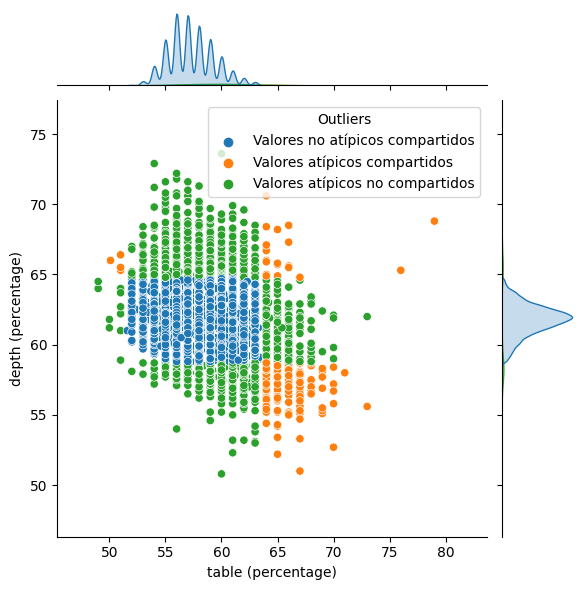

In [161]:
# La correlación más relevante de "table" es su correlación inversa con "depth (percentage)"
# Por tanto, para investigar sus valores atípicos los estudiamos juntos
df_diamonds['Outliers'] = 'Valores no atípicos compartidos'

q3_table, q1_table = np.percentile(df_diamonds['table (percentage)'], [75, 25])
iqr_table = q3_table - q1_table
df_diamonds.loc[((df_diamonds['table (percentage)'] > q3_table + 1.5*iqr_table) | (df_diamonds['table (percentage)'] < q1_table - 1.5*iqr_table)), 'Outliers'] = 'Valores atípicos no compartidos'

q3_depth, q1_depth = np.percentile(df_diamonds['depth (percentage)'], [75, 25])
iqr_depth = q3_depth - q1_depth
df_diamonds.loc[((df_diamonds['depth (percentage)'] > q3_depth + 1.5*iqr_depth) | (df_diamonds['depth (percentage)'] < q1_depth - 1.5*iqr_depth)), 'Outliers'] = 'Valores atípicos no compartidos'

df_diamonds.loc[((df_diamonds['table (percentage)'] > q3_table + 1.5*iqr_table) | (df_diamonds['table (percentage)'] < q1_table - 1.5*iqr_table))
                & ((df_diamonds['depth (percentage)'] > q3_depth + 1.5*iqr_depth) | (df_diamonds['depth (percentage)'] < q1_depth - 1.5*iqr_depth)), 'Outliers'] = 'Valores atípicos compartidos'

sns.jointplot(data=df_diamonds, x='table (percentage)', y='depth (percentage)', hue='Outliers')
plt.show()


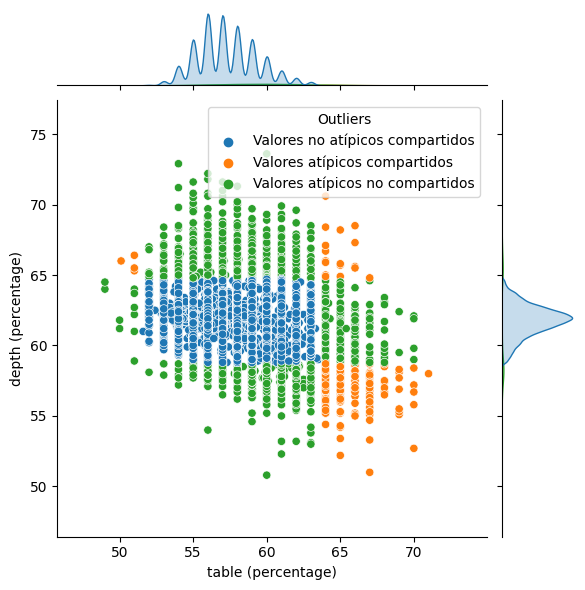

In [162]:
# Eliminamos esos cuatro valores que están muy alejados del resto del conjunto y repetimos la gráfica
df_diamonds = df_diamonds.drop(df_diamonds[df_diamonds['table (percentage)'] > 72].index)

sns.jointplot(data=df_diamonds, x='table (percentage)', y='depth (percentage)', hue='Outliers')
plt.show()


In [163]:
# Vemos que comparten algunos "outliers". Se trata de:
# a) los diamantes con mayor tabla y mayor profundidad (algunos);
# b) los diamantes con mayor tabla y menor profundidad (pocos);
# y c) los diamantes con menor tabla y mayor profundidad (muchos)
print(f"""Nº valores atípicos compartidos: {len(df_diamonds[df_diamonds['Outliers'] == 'Valores atípicos compartidos'])}
Nº valores atípicos no compartidos: {len(df_diamonds[df_diamonds['Outliers'] == 'Valores atípicos no compartidos'])}
Nº valores no atípicos compartidos: {len(df_diamonds[df_diamonds['Outliers'] == 'Valores no atípicos compartidos'])}""")


Nº valores atípicos compartidos: 212
Nº valores atípicos no compartidos: 2686
Nº valores no atípicos compartidos: 50875


### "Outliers" tratados de "depth (percentage)" y "table (percentage)"

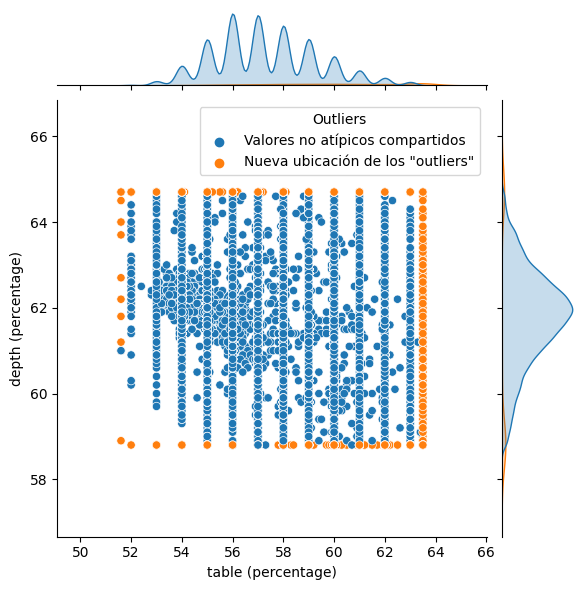

In [164]:
# Con esa información, deducimos que la correlación negativa (-0.3) se debe al peso de los "outliers" de mayor tabla y menor profundidad, que son más numerosos
# Esa correlación es especialmente importante porque es la única lo bastante alta como para vincular las dos variables, si el modelo acaba trabajando con una de ellas
# Con tal de preservar esa correlación, imputamos los valores atípicos a los máximos y mínimos de los no atípicos
max_depth = df_diamonds[df_diamonds['Outliers'] == 'Valores no atípicos compartidos']['depth (percentage)'].max()
min_depth = df_diamonds[df_diamonds['Outliers'] == 'Valores no atípicos compartidos']['depth (percentage)'].min()
max_table = df_diamonds[df_diamonds['Outliers'] == 'Valores no atípicos compartidos']['table (percentage)'].max()
min_table = df_diamonds[df_diamonds['Outliers'] == 'Valores no atípicos compartidos']['table (percentage)'].min()

df_diamonds.loc[df_diamonds['Outliers'] == 'Valores atípicos compartidos', 'Outliers'] = 'Valores atípicos no compartidos'

df_diamonds.loc[(df_diamonds['Outliers'] == 'Valores atípicos no compartidos') & (df_diamonds['depth (percentage)'] > max_depth), 'depth (percentage)'] = max_depth
df_diamonds.loc[(df_diamonds['Outliers'] == 'Valores atípicos no compartidos') & (df_diamonds['depth (percentage)'] < min_depth), 'depth (percentage)'] = min_depth
df_diamonds.loc[(df_diamonds['Outliers'] == 'Valores atípicos no compartidos') & (df_diamonds['table (percentage)'] > max_table), 'table (percentage)'] = max_table
df_diamonds.loc[(df_diamonds['Outliers'] == 'Valores atípicos no compartidos') & (df_diamonds['table (percentage)'] < min_table), 'table (percentage)'] = min_table

df_diamonds.loc[df_diamonds['Outliers'] == 'Valores atípicos no compartidos', 'Outliers'] = 'Nueva ubicación de los "outliers"'

sns.jointplot(data=df_diamonds, x='table (percentage)', y='depth (percentage)', hue='Outliers')
plt.show()


-0.3000648593272154


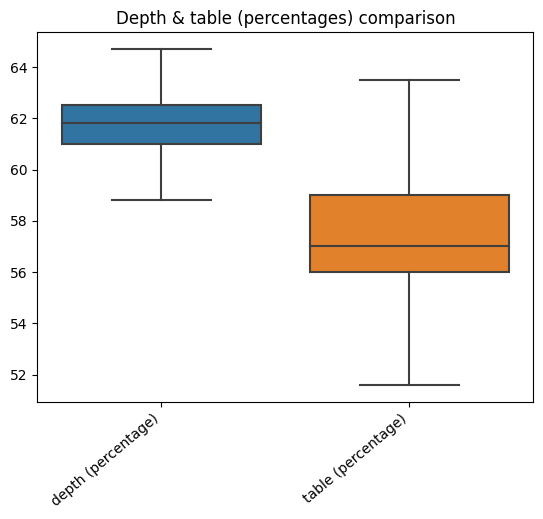

In [165]:
# La correlación inversa se mantiene en la misma cifra y ya no hay valores atípicos
df_diamonds = df_diamonds.drop(columns='Outliers')

print(df_diamonds['depth (percentage)'].corr(df_diamonds['table (percentage)']))

ax = sns.boxplot(df_diamonds[['depth (percentage)', 'table (percentage)']])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Depth & table (percentages) comparison')
plt.show()


In [166]:
# Finalmente, reducimos las cifras de ambas variables, que son muy elevadas en comparación al resto, para facilitarle el trabajo al modelo
for column in df_diamonds:
    if column == 'depth (percentage)' or column == 'table (percentage)':
        df_diamonds[column] = df_diamonds[column] / 100


## PENDIENTE: cut quality & table (percentage)

In [167]:
# Las variables "cut quality" y "table" tienen una alta correlación inversa


# Observaciones finales

In [168]:
# Con tantos cambios, hay muchos valores que no se encuentran en el índice. Lo reseteamos
stored_values = [-1]
for value in df_diamonds.index:
    if value - 1 not in stored_values:
        print(f'{value -1} not in index')
    stored_values.append(value)

df_diamonds = df_diamonds.reset_index(drop=True)


1008 not in index
2025 not in index
2183 not in index
2820 not in index
3156 not in index
3704 not in index
3981 not in index
4386 not in index
4493 not in index
4518 not in index
4520 not in index
5175 not in index
5665 not in index
6337 not in index
6341 not in index
7711 not in index
7744 not in index
8331 not in index
8601 not in index
9196 not in index
9593 not in index
10180 not in index
10363 not in index
10377 not in index
10472 not in index
11009 not in index
11243 not in index
11315 not in index
11368 not in index
11963 not in index
12266 not in index
12293 not in index
12644 not in index
13860 not in index
14002 not in index
14922 not in index
15012 not in index
15317 not in index
15455 not in index
15951 not in index
16269 not in index
17138 not in index
17555 not in index
18689 not in index
19676 not in index
20629 not in index
21047 not in index
21602 not in index
21783 not in index
22146 not in index
22148 not in index
22375 not in index
22392 not in index
22809 not in i

In [169]:
# Todos los números han quedado pequeños, ninguna columna tiene valores excesivamente altos
df_diamonds.head()


,weight (carat),cut quality,color quality,clarity quality,depth (percentage),table (percentage),price (dollars),lenght (millimeters),width (millimeters),depth (millimeters)
0,-1.469676,4,5,1,0.615,0.550,-0.904437,1.373716,1.381282,0.887891
1,-1.560648,3,5,2,0.598,0.610,-0.904437,1.358409,1.345472,0.837248
2,-1.469676,1,5,4,0.588,0.635,-0.904186,1.398717,1.403643,0.837248
3,-1.237874,3,1,3,0.624,0.580,-0.902431,1.435085,1.442202,0.966984
4,-1.171183,1,0,1,0.633,0.580,-0.902180,1.467874,1.470176,1.011601


In [170]:
# Se han borrado 23 filas respecto a las 53940 iniciales
df_diamonds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53773 entries, 0 to 53772
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   weight (carat)        53773 non-null  float64
 1   cut quality           53773 non-null  int32  
 2   color quality         53773 non-null  int32  
 3   clarity quality       53773 non-null  int64  
 4   depth (percentage)    53773 non-null  float64
 5   table (percentage)    53773 non-null  float64
 6   price (dollars)       53773 non-null  float64
 7   lenght (millimeters)  53773 non-null  float64
 8   width (millimeters)   53773 non-null  float64
 9   depth (millimeters)   53773 non-null  float64
dtypes: float64(7), int32(2), int64(1)
memory usage: 3.7 MB


In [171]:
# Todas las columnas son numéricas y no hay ceros en las variables relacionadas con el tamaño
df_diamonds.describe()


,weight (carat),cut quality,color quality,clarity quality,depth (percentage),table (percentage),price (dollars),lenght (millimeters),width (millimeters),depth (millimeters)
count,53773.000000,53773.000000,53773.000000,53773.000000,53773.000000,53773.000000,53773.000000,53773.000000,53773.000000,53773.000000
mean,-0.395032,2.904673,3.406059,3.052034,0.617486,0.574394,-0.000161,1.727240,1.727846,1.245205
std,0.584448,1.115522,1.701157,1.646932,0.012636,0.021595,0.999830,0.193618,0.192204,0.193714
min,-1.609438,0.000000,0.000000,0.000000,0.588000,0.516000,-0.904437,1.316408,1.302913,0.722706
25%,-0.916291,2.000000,2.000000,2.000000,0.610000,0.560000,-0.747721,1.549688,1.551809,1.068153
50%,-0.356675,3.000000,3.000000,3.000000,0.618000,0.570000,-0.384141,1.740466,1.742219,1.261298
75%,0.039221,4.000000,5.000000,4.000000,0.625000,0.590000,0.349289,1.877937,1.877937,1.396245
max,1.472488,4.000000,6.000000,7.000000,0.647000,0.635000,3.733597,2.355178,2.355178,1.873919


In [172]:
# No hay duplicados
df_diamonds[df_diamonds.duplicated()]


,weight (carat),cut quality,color quality,clarity quality,depth (percentage),table (percentage),price (dollars),lenght (millimeters),width (millimeters),depth (millimeters)


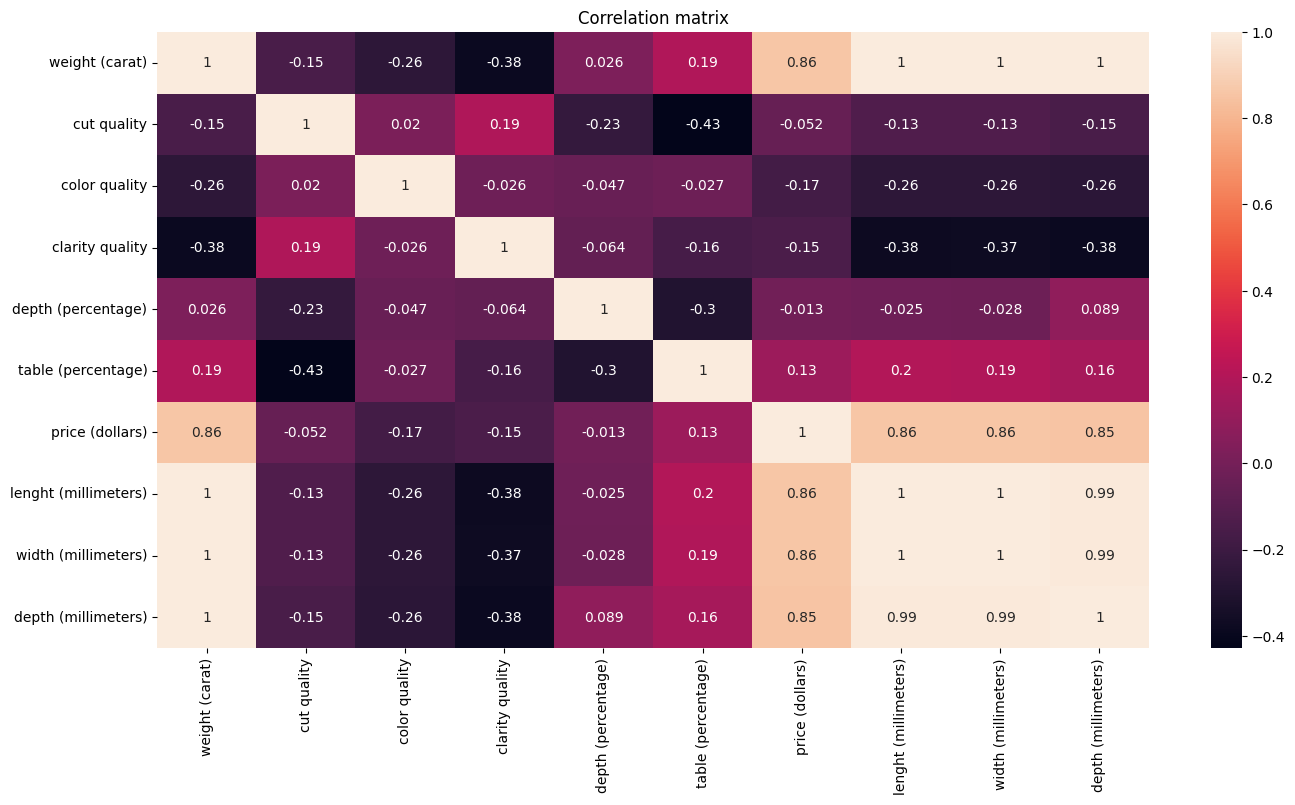

In [173]:
# La correlación ha cambiado un poco (por ejemplo, algunos valores se han convertido en 1) debido a la tipificación de los datos
# La tendencia general es similar y se han incorporado las variables que eran categóricas
plt.rc("figure", figsize=(16, 8))

corr = df_diamonds.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.title('Correlation matrix')
plt.show()


In [174]:
plt.rc("figure", figsize=(6.4, 4.8))


In [175]:
# El "dataframe" está preparado para el modelaje. Lo exportamos
df_diamonds.to_csv(r'..\data\raw\processed_diamonds_1.csv', index=False)
